# Praproses data


In [403]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("house_price_data_2.csv")
df_copy = df.copy()


df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21616 non-null  int64  
 1   date           21616 non-null  object 
 2   price          21616 non-null  float64
 3   bedrooms       21616 non-null  int64  
 4   bathrooms      21616 non-null  float64
 5   sqft_living    21616 non-null  int64  
 6   sqft_lot       21616 non-null  int64  
 7   floors         21616 non-null  float64
 8   waterfront     21616 non-null  int64  
 9   view           21616 non-null  int64  
 10  condition      21616 non-null  int64  
 11  grade          21616 non-null  int64  
 12  sqft_above     21616 non-null  int64  
 13  sqft_basement  21616 non-null  int64  
 14  yr_built       21616 non-null  int64  
 15  yr_renovated   21616 non-null  int64  
 16  zipcode        21616 non-null  int64  
 17  lat            21616 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161600e+04,2.161600e+04,21616.000000,21616.000000,21616.000000,2.161600e+04,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000
mean,4.584716e+09,5.401300e+05,3.370883,2.114556,2079.745281,1.510567e+04,1.494240,0.007541,0.234271,3.409419,7.656736,1788.288212,291.506060,1970.999028,84.390544,98077.943283,47.560045,-122.213909,1986.501157,12767.126619
std,2.939452e+09,3.673664e+05,0.930120,0.770319,918.509130,4.141781e+04,0.539983,0.086511,0.766269,0.650722,1.175448,828.080173,442.559214,29.377054,401.652595,53.510533,0.138566,0.140825,685.374023,27302.574721
min,1.000102e+06,1.000000e+01,0.000000,0.000000,1.000000,2.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,-3456.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.280003e+10,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [404]:
long_square = (df['long'] * df['long']).to_frame(name='long_square')
sqft_lot15_square = (df['sqft_lot15'] * df['sqft_lot15']).to_frame(name='sqft_lot15_square')
df_cleaned = pd.concat([df, long_square], axis=1)
df_cleaned = pd.concat([df_cleaned, sqft_lot15_square], axis=1)
df_cleaned = df_cleaned.drop(columns='long')
df_cleaned = df_cleaned.drop(columns='sqft_lot15')
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,long_square,sqft_lot15_square
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,1340,14946.774049,31922500
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,1690,14961.937761,58354321
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,2720,14940.906289,64995844
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,1360,14980.046449,25000000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,1800,14894.982025,56295009


# Data untuk training


In [405]:
y = df_cleaned['price']
# df_cleaned.drop(columns=['price'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

# Eksplorasi Pemilihan Fitur terbaik

Pemilihan fitur terbaik didapat dengan membuat dcatter plotnya dan menghitung nilai r2 untuk masing masing kolom.

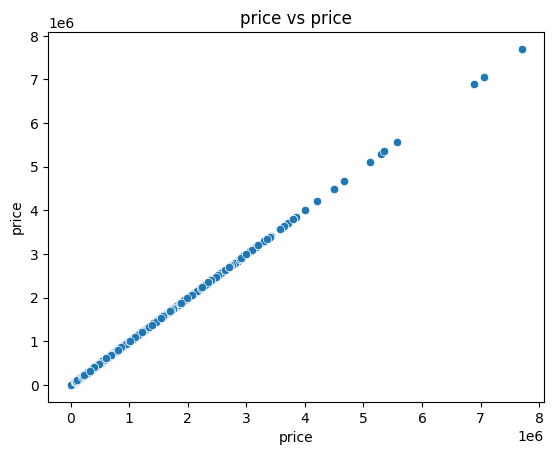

Linear regression for column: price
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R² Score: 1.0



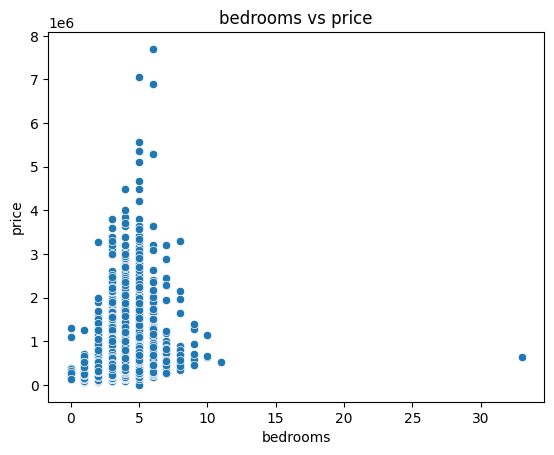

Linear regression for column: bedrooms
Mean Absolute Error (MAE): 217103.80543390036
Mean Squared Error (MSE): 111757210208.00168
Root Mean Squared Error (RMSE): 334301.0771864214
R² Score: 0.1033746081918312



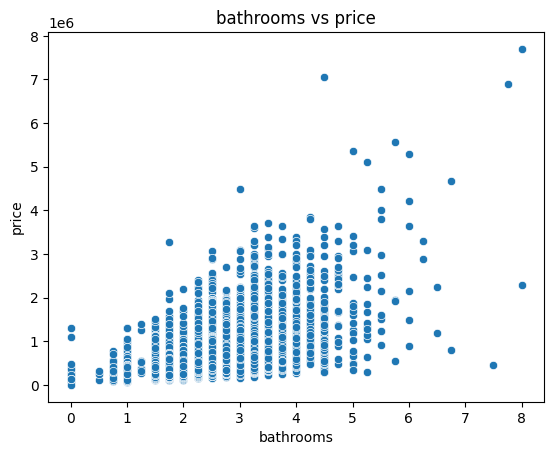

Linear regression for column: bathrooms
Mean Absolute Error (MAE): 201685.8035173209
Mean Squared Error (MSE): 90205511196.96608
Root Mean Squared Error (RMSE): 300342.32335281366
R² Score: 0.2762833675813704



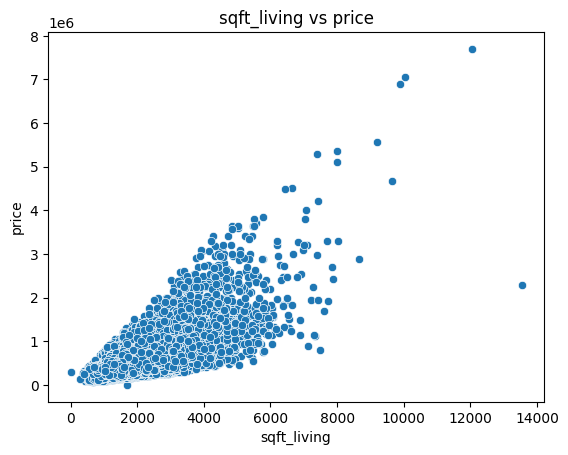

Linear regression for column: sqft_living
Mean Absolute Error (MAE): 173931.17427090954
Mean Squared Error (MSE): 65340236444.019264
Root Mean Squared Error (RMSE): 255617.363346114
R² Score: 0.4757768649251545



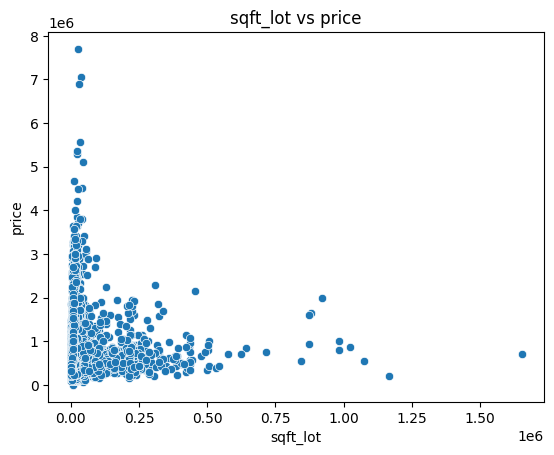

Linear regression for column: sqft_lot
Mean Absolute Error (MAE): 230615.4580403676
Mean Squared Error (MSE): 124024092254.75685
Root Mean Squared Error (RMSE): 352170.5442747261
R² Score: 0.004957710517259906



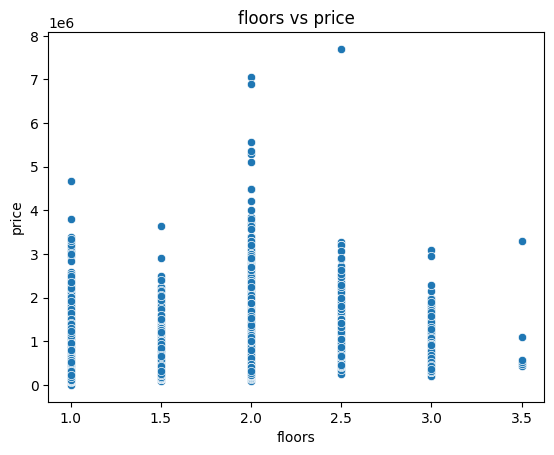

Linear regression for column: floors
Mean Absolute Error (MAE): 221872.2738549128
Mean Squared Error (MSE): 117166201093.18819
Root Mean Squared Error (RMSE): 342295.4879825152
R² Score: 0.05997840527399978



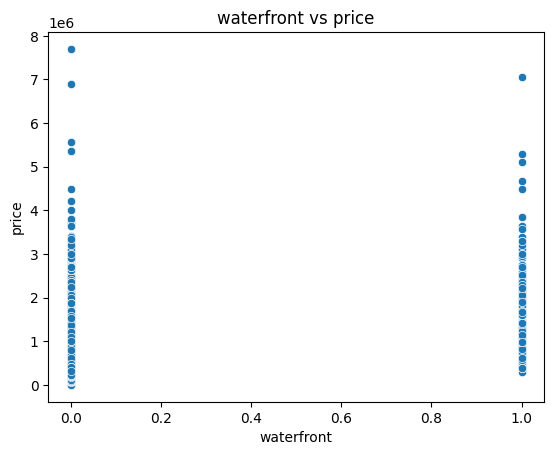

Linear regression for column: waterfront
Mean Absolute Error (MAE): 226883.41472809596
Mean Squared Error (MSE): 114682157623.61465
Root Mean Squared Error (RMSE): 338647.5418833195
R² Score: 0.0799078258906164



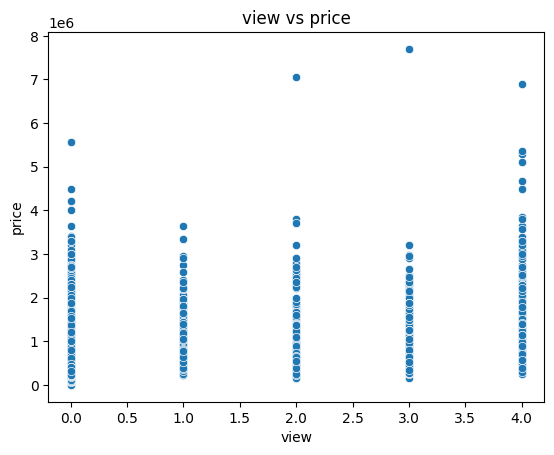

Linear regression for column: view
Mean Absolute Error (MAE): 214970.3128645227
Mean Squared Error (MSE): 101947968973.7907
Root Mean Squared Error (RMSE): 319292.92033145786
R² Score: 0.18207391312791255



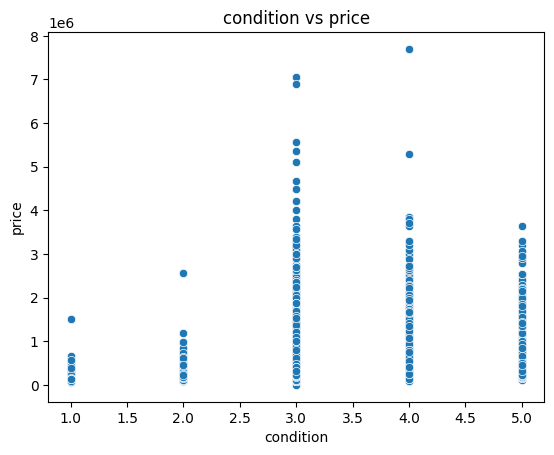

Linear regression for column: condition
Mean Absolute Error (MAE): 231056.38133096948
Mean Squared Error (MSE): 124347873831.92339
Root Mean Squared Error (RMSE): 352629.9389330455
R² Score: 0.002360018762545435



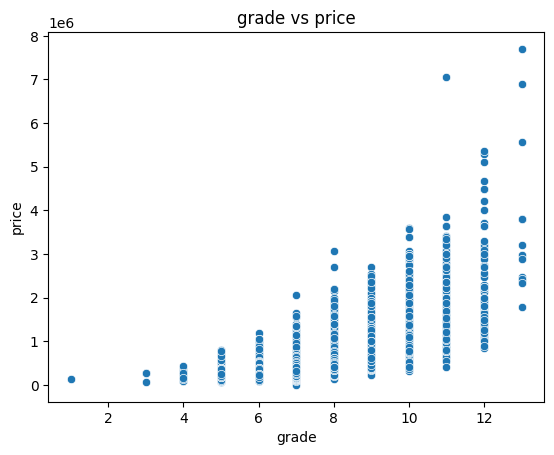

Linear regression for column: grade
Mean Absolute Error (MAE): 174111.2611243394
Mean Squared Error (MSE): 69204383427.82999
Root Mean Squared Error (RMSE): 263067.26027354674
R² Score: 0.44477490722671886



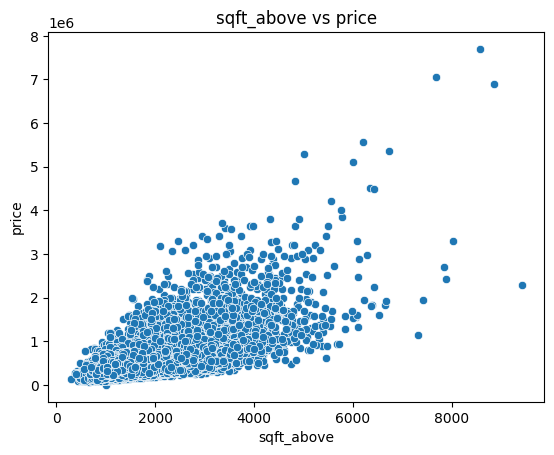

Linear regression for column: sqft_above
Mean Absolute Error (MAE): 190551.5973627983
Mean Squared Error (MSE): 82292306026.16585
Root Mean Squared Error (RMSE): 286866.35568878736
R² Score: 0.33977082108456436



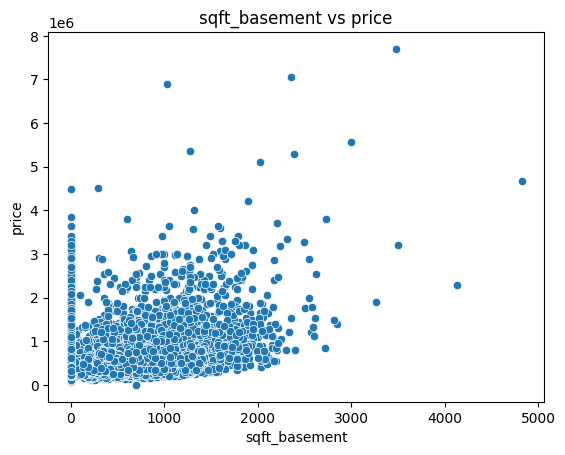

Linear regression for column: sqft_basement
Mean Absolute Error (MAE): 220392.39138044356
Mean Squared Error (MSE): 108087770091.4255
Root Mean Squared Error (RMSE): 328767.045324536
R² Score: 0.13281443740838184



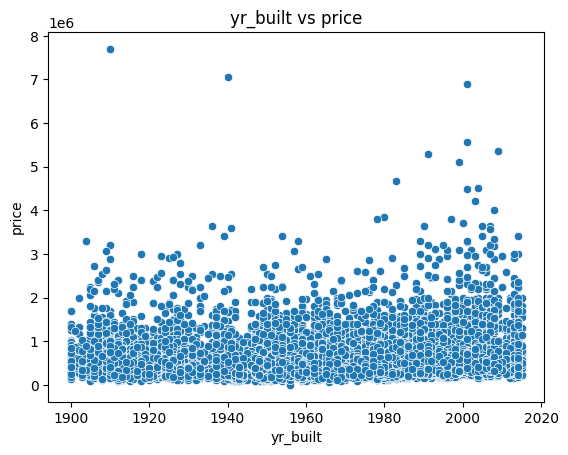

Linear regression for column: yr_built
Mean Absolute Error (MAE): 231572.9572056825
Mean Squared Error (MSE): 124212738487.89322
Root Mean Squared Error (RMSE): 352438.27613908966
R² Score: 0.003444206356014168



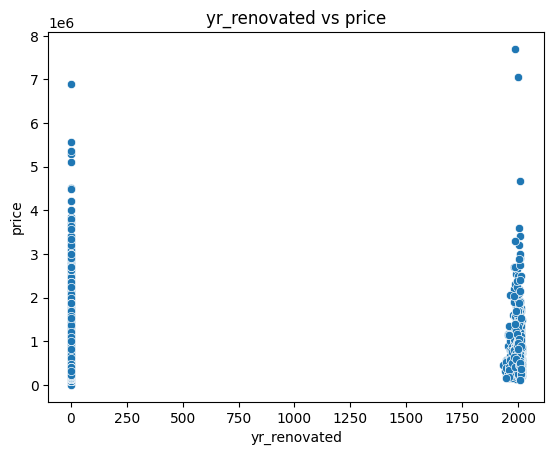

Linear regression for column: yr_renovated
Mean Absolute Error (MAE): 230040.64080410884
Mean Squared Error (MSE): 122539275368.3458
Root Mean Squared Error (RMSE): 350056.1031725426
R² Score: 0.0168703604488738



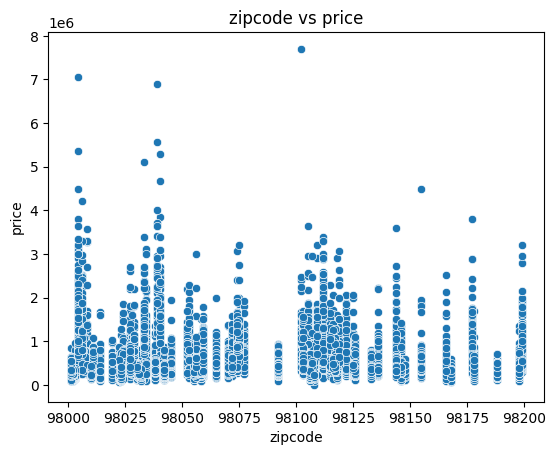

Linear regression for column: zipcode
Mean Absolute Error (MAE): 231763.98043224323
Mean Squared Error (MSE): 124617820708.01128
Root Mean Squared Error (RMSE): 353012.4936996016
R² Score: 0.0001942415112236029



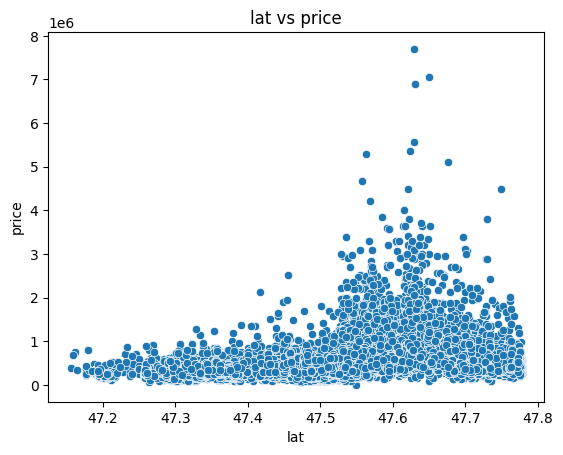

Linear regression for column: lat
Mean Absolute Error (MAE): 209297.47030750467
Mean Squared Error (MSE): 111798947430.89224
Root Mean Squared Error (RMSE): 334363.4959604476
R² Score: 0.10303975146305644



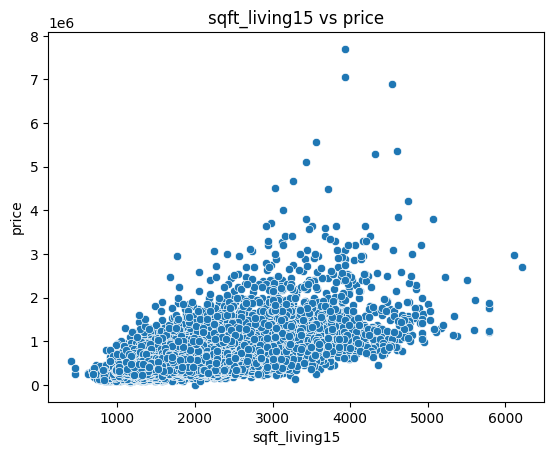

Linear regression for column: sqft_living15
Mean Absolute Error (MAE): 185337.97566030867
Mean Squared Error (MSE): 81341425395.387
Root Mean Squared Error (RMSE): 285204.181938812
R² Score: 0.34739971336406983



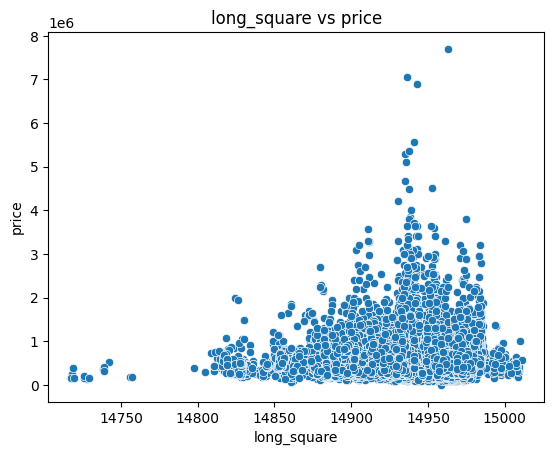

Linear regression for column: long_square
Mean Absolute Error (MAE): 231358.3604513228
Mean Squared Error (MSE): 124629881662.46846
Root Mean Squared Error (RMSE): 353029.5761865689
R² Score: 9.747676561455698e-05



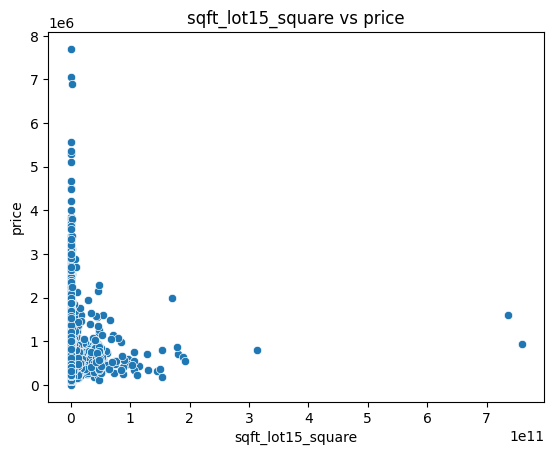

Linear regression for column: sqft_lot15_square
Mean Absolute Error (MAE): 231306.22701156922
Mean Squared Error (MSE): 124525704436.6797
Root Mean Squared Error (RMSE): 352881.99789260956
R² Score: 0.0009332881259417336

Best features based on R² score:
[('price', 1.0), ('sqft_living', 0.4757768649251545), ('grade', 0.44477490722671886), ('sqft_above', 0.33977082108456436), ('sqft_living15', 0.34739971336406983)]


In [406]:
best_features = []

r2_threshold = 0.3


for col in df_cleaned.columns[2:]:
    sns.scatterplot(x=col, y='price', data=df_cleaned)
    plt.title(f'{col} vs price')
    plt.show()

    X = df_cleaned[[col]]
    X_train_col, X_test_col, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train_col, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_col)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear regression for column: {col}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print()

    if r2 > r2_threshold:
        best_features.append((col, r2))

print("Best features based on R² score:")
print(best_features)

Kesimpulan : Didapatkan beberapa kolom terbaik yang didapatkan berdasarkan nilai r2 diataranya


Best features based on R² score:
['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

# Pembuatan Model : Simple Linear Regression

Linear regression for column: price
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R² Score: 1.0



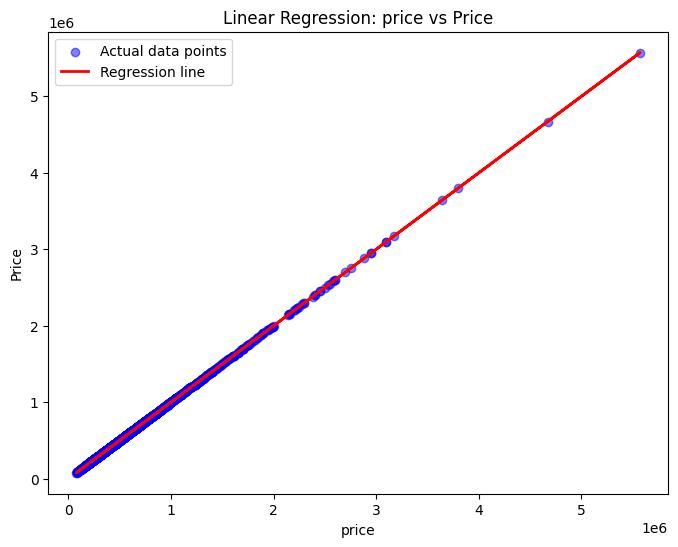

Linear regression for column: sqft_living
Mean Absolute Error (MAE): 173931.17427090954
Mean Squared Error (MSE): 65340236444.019264
Root Mean Squared Error (RMSE): 255617.363346114
R² Score: 0.4757768649251545



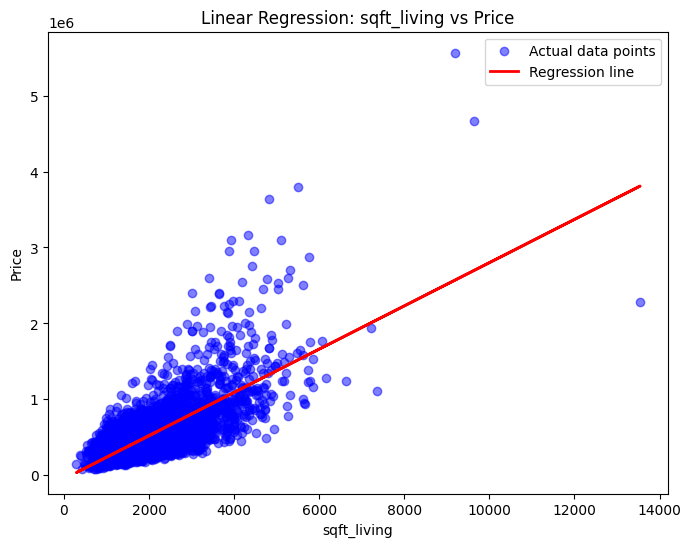

Linear regression for column: grade
Mean Absolute Error (MAE): 174111.2611243394
Mean Squared Error (MSE): 69204383427.82999
Root Mean Squared Error (RMSE): 263067.26027354674
R² Score: 0.44477490722671886



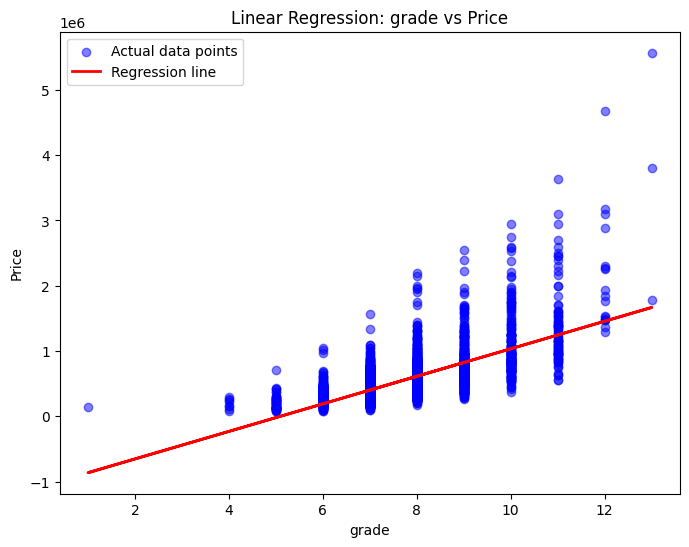

Linear regression for column: sqft_above
Mean Absolute Error (MAE): 190551.5973627983
Mean Squared Error (MSE): 82292306026.16585
Root Mean Squared Error (RMSE): 286866.35568878736
R² Score: 0.33977082108456436



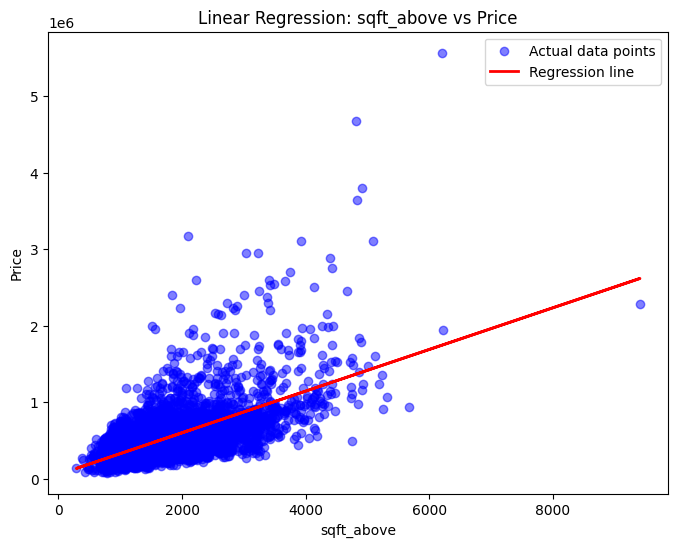

Linear regression for column: sqft_living15
Mean Absolute Error (MAE): 185337.97566030867
Mean Squared Error (MSE): 81341425395.387
Root Mean Squared Error (RMSE): 285204.181938812
R² Score: 0.34739971336406983



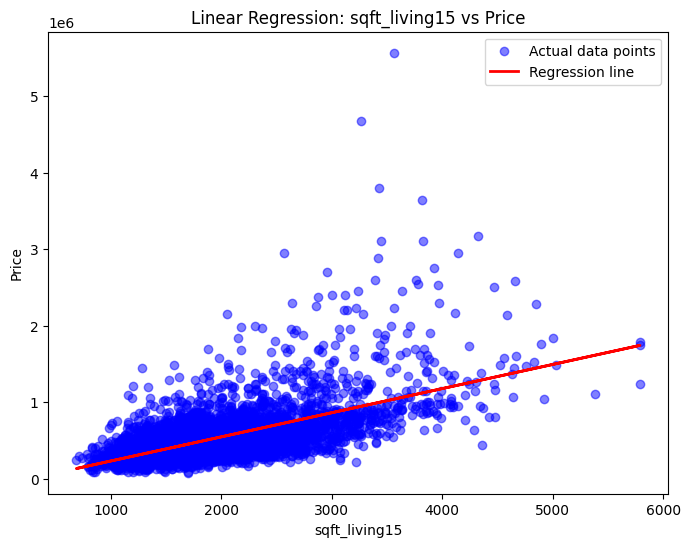

In [407]:
for col in best_features:
    col = col [0]
    X = df_cleaned[[col]]
    X_train_col, X_test_col, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train_col, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_col)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear regression for column: {col}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_col, y_test, color="blue", label="Actual data points", alpha=0.5)
    plt.plot(X_test_col, y_pred, color="red", label="Regression line", linewidth=2)
    plt.title(f'Linear Regression: {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Pembuatan Model : Simple Linear Regression dengan K Fold


--- K-Fold Cross-Validation with k = 2 ---

Results for k = 2:
          Column           MAE           MSE          RMSE        R²
0          price  9.819917e-11  3.589869e-20  1.715731e-10  1.000000
1    sqft_living  1.739345e+05  6.859813e+10  2.618679e+05  0.491457
2          grade  1.753654e+05  7.492634e+10  2.736387e+05  0.444898
3     sqft_above  1.920153e+05  8.555132e+10  2.924459e+05  0.365733
4  sqft_living15  1.867980e+05  8.880182e+10  2.979386e+05  0.341756
-------------------------------------------------

--- K-Fold Cross-Validation with k = 3 ---

Results for k = 3:
          Column           MAE           MSE          RMSE        R²
0          price  1.340255e-10  5.914068e-20  2.147949e-10  1.000000
1    sqft_living  1.739389e+05  6.865613e+10  2.618641e+05  0.490298
2          grade  1.754126e+05  7.500440e+10  2.735657e+05  0.444290
3     sqft_above  1.920160e+05  8.559335e+10  2.923715e+05  0.364690
4  sqft_living15  1.868388e+05  8.885434e+10  2.977921e+05  0.3

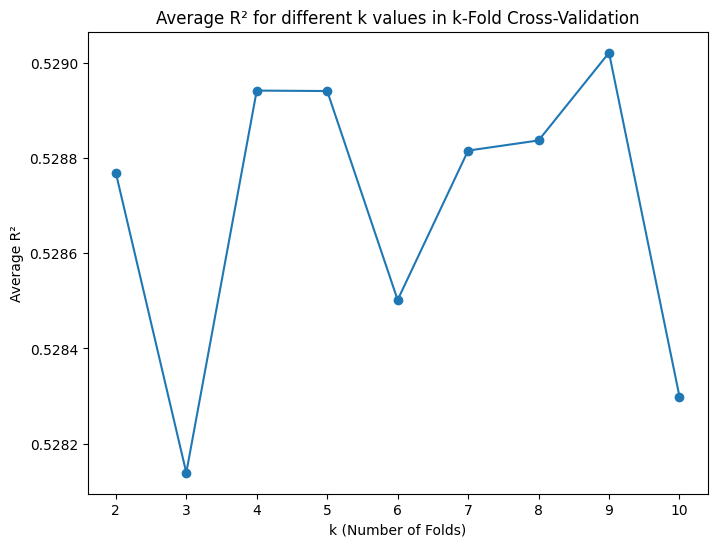

In [408]:
y = df_cleaned['price']

k_values = range(2, 11)
results_summary = []

for k in k_values:
    print(f"\n--- K-Fold Cross-Validation with k = {k} ---\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    results = []

    for col in best_features:
        col = col[0]
        X = df_cleaned[[col]]

        model = LinearRegression()

        maes, mses, rmses, r2s = [], [], [], []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            maes.append(mae)
            mses.append(mse)
            rmses.append(rmse)
            r2s.append(r2)

        avg_mae = np.mean(maes)
        avg_mse = np.mean(mses)
        avg_rmse = np.mean(rmses)
        avg_r2 = np.mean(r2s)

        results.append({
            'Column': col,
            'MAE': avg_mae,
            'MSE': avg_mse,
            'RMSE': avg_rmse,
            'R²': avg_r2
        })

    results_df = pd.DataFrame(results)

    avg_r2_all_k = np.mean(results_df['R²'])
    results_summary.append({
        'k': k,
        'Avg R²': avg_r2_all_k
    })

    print(f"Results for k = {k}:")
    print(results_df)
    print("-------------------------------------------------")
summary_df = pd.DataFrame(results_summary)
print("\nSummary of R² for different k values:")
print(summary_df)

plt.figure(figsize=(8, 6))
plt.plot(summary_df['k'], summary_df['Avg R²'], marker='o')
plt.title('Average R² for different k values in k-Fold Cross-Validation')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Average R²')
plt.show()


# Pembuatan Model : Multiple Linear Regression

Multiple Linear Regression Using Combined sqft_living, grade, sqft_above, sqft_living15:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R² Score: 1.0



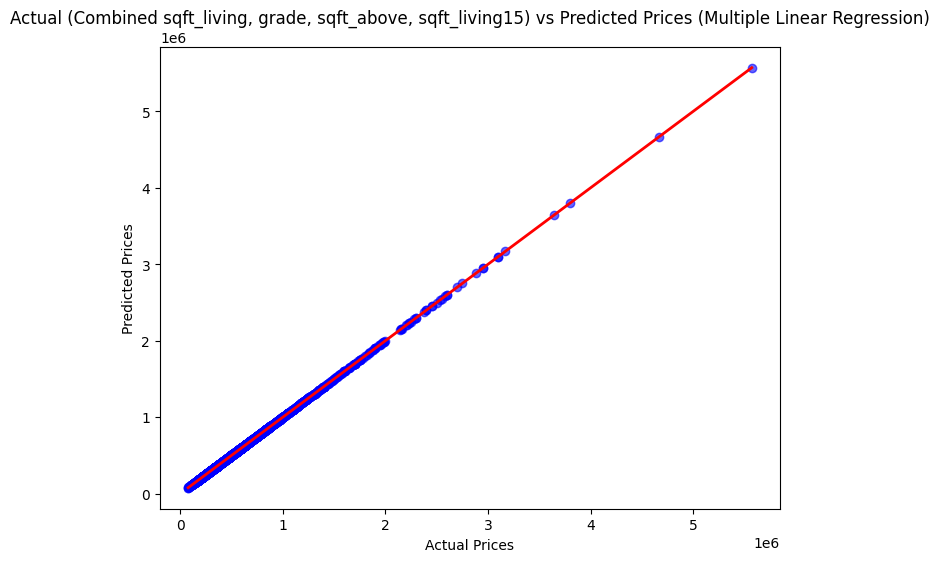

In [409]:
X = df_cleaned[[col[0] for col in best_features]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Multiple Linear Regression Using Combined sqft_living, grade, sqft_above, sqft_living15:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.title("Actual (Combined sqft_living, grade, sqft_above, sqft_living15) vs Predicted Prices (Multiple Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()



--- K-Fold Cross-Validation with k = 2 ---

Results for k = 2:
Average MAE: 1.7808489726878536e-10
Average MSE: 8.483125591706847e-20
Average RMSE: 2.873149319850801e-10
Average R²: 1.0
-------------------------------------------------

--- K-Fold Cross-Validation with k = 3 ---

Results for k = 3:
Average MAE: 1.9984391322974105e-10
Average MSE: 1.0958810399323994e-19
Average RMSE: 3.2567259530255124e-10
Average R²: 1.0
-------------------------------------------------

--- K-Fold Cross-Validation with k = 4 ---

Results for k = 4:
Average MAE: 1.3718174642954807e-10
Average MSE: 6.658386879244747e-20
Average RMSE: 2.2725522240590313e-10
Average R²: 1.0
-------------------------------------------------

--- K-Fold Cross-Validation with k = 5 ---

Results for k = 5:
Average MAE: 1.4028703454292175e-10
Average MSE: 5.506353551780388e-20
Average RMSE: 2.258723216364313e-10
Average R²: 1.0
-------------------------------------------------

--- K-Fold Cross-Validation with k = 6 ---

Resu

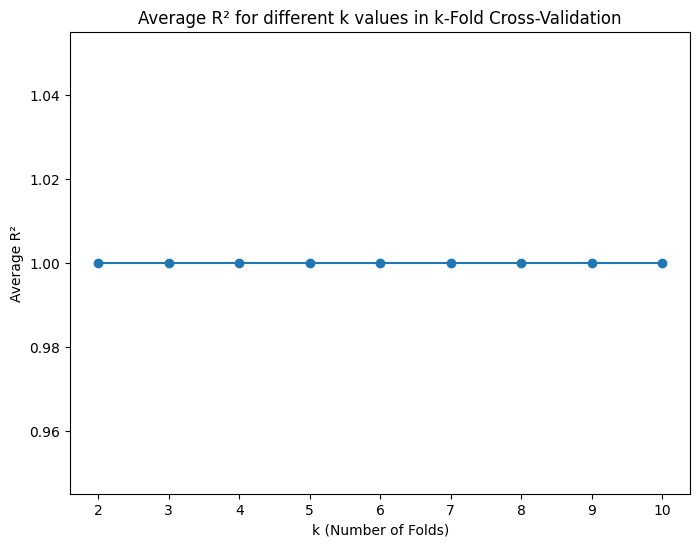

In [410]:
y = df_cleaned['price']
k_values = range(2, 11)
results_summary = []

# List of features to be used in the model
features = [col[0] for col in best_features]

# Loop through different k values (number of folds)
for k in k_values:
    print(f"\n--- K-Fold Cross-Validation with k = {k} ---\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    results = []

    # Select all the relevant columns for the model (multiple predictors)
    X = df_cleaned[features]

    model = LinearRegression()

    maes, mses, rmses, r2s = [], [], [], []

    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        maes.append(mae)
        mses.append(mse)
        rmses.append(rmse)
        r2s.append(r2)

    # Calculate average metrics for the current fold
    avg_mae = np.mean(maes)
    avg_mse = np.mean(mses)
    avg_rmse = np.mean(rmses)
    avg_r2 = np.mean(r2s)

    results_summary.append({
        'k': k,
        'Avg R²': avg_r2,
        'Avg MAE': avg_mae,
        'Avg MSE': avg_mse,
        'Avg RMSE': avg_rmse
    })

    print(f"Results for k = {k}:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average RMSE: {avg_rmse}")
    print(f"Average R²: {avg_r2}")
    print("-------------------------------------------------")

# Summary of results for different k values
summary_df = pd.DataFrame(results_summary)
print("\nSummary of Results for different k values:")
print(summary_df)

# Plot the average R² scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(summary_df['k'], summary_df['Avg R²'], marker='o')
plt.title('Average R² for different k values in k-Fold Cross-Validation')
plt.xlabel('k (Number of Folds)')
plt.ylabel('Average R²')
plt.show()

# Model Terbaik : Multiple Linear Regresion, K = 9

## Training

In [411]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)

features = [col[0] for col in best_features]
print(features)
X = df_cleaned[features]
X = X.drop(columns=['price'])
Y = df_cleaned['price']

model = LinearRegression()
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model.fit(X_train, y_train)

['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


## Prediksi menggunakan model terbaik

In [412]:
# Data
data = {
    "id": [
        7129300521, 6414100193, 5631500401, 2487200876, 1954400511,
        7631200453, 5321400887, 8192031345, 4567812345, 9876543210,
        1432679856, 2758493021, 4839201567, 5632094817, 9875643217,
        6748392015, 1029384756, 9483021567, 5630274912, 7893452106
    ],
    "date": [
        "20231115T000000", "20231010T000000", "20230820T000000", "20230505T000000", "20230125T000000",
        "20230912T000000", "20230718T000000", "20230630T000000", "20230420T000000", "20231201T000000",
        "20231102T000000", "20231022T000000", "20230928T000000", "20230825T000000", "20230710T000000",
        "20230615T000000", "20230522T000000", "20230412T000000", "20230315T000000", "20230220T000000"
    ],
    "bedrooms": [
        3, 4, 2, 3, 5,
        3, 4, 3, 2, 6,
        4, 5, 3, 3, 5,
        3, 4, 3, 2, 4
    ],
    "bathrooms": [
        2.0, 3.5, 1.5, 2.5, 4.0,
        1.5, 2.0, 2.5, 1.0, 4.5,
        2.5, 3.0, 2.0, 2.5, 4.0,
        1.5, 3.5, 2.5, 1.5, 3.0
    ],
    "sqft_living": [
        1500, 2800, 1000, 1900, 3200,
        1200, 2500, 1800, 950, 3500,
        2100, 2700, 1600, 1900, 3100,
        1300, 2400, 1700, 980, 2600
    ],
    "sqft_lot": [
        4000, 7000, 5000, 6000, 9000,
        4200, 8000, 5800, 4800, 12000,
        5200, 7500, 6200, 5600, 11000,
        4300, 7900, 5700, 4900, 8300
    ],
    "floors": [1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2],
    "waterfront": [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
    "view": [1, 2, 0, 1, 3, 0, 2, 1, 0, 4, 1, 3, 1, 2, 3, 0, 2, 1, 0, 2],
    "condition": [4, 5, 3, 4, 5, 3, 4, 4, 3, 5, 4, 5, 4, 3, 5, 3, 5, 4, 3, 4],
    "grade": [7, 9, 6, 8, 10, 6, 8, 7, 5, 11, 8, 9, 7, 7, 10, 6, 9, 7, 6, 9],
    "sqft_above": [
        1500, 2100, 800, 1700, 2700,
        1200, 2100, 1400, 800, 3000,
        1800, 2200, 1400, 1600, 2600,
        1200, 1900, 1400, 800, 2100
    ],
    "sqft_basement": [
        0, 700, 200, 200, 500,
        0, 400, 400, 150, 500,
        300, 500, 200, 300, 500,
        100, 500, 300, 180, 500
    ],
    "yr_built": [
        1980, 1995, 1960, 1985, 2005,
        1975, 1990, 1982, 1958, 2010,
        1988, 1993, 1975, 1981, 2003,
        1970, 1985, 1980, 1955, 1998
    ],
    "yr_renovated": [
        2000, 2015, 0, 2010, 2022,
        1998, 2012, 2010, 0, 2021,
        2005, 2010, 2008, 2010, 2020,
        1995, 2010, 2005, 0, 2018
    ],
    "zipcode": [
        98001, 98002, 98003, 98004, 98005,
        98006, 98007, 98008, 98009, 98010,
        98011, 98012, 98013, 98014, 98015,
        98016, 98017, 98018, 98019, 98020
    ],
    "lat": [
        47.5310, 47.7215, 47.6900, 47.5600, 47.6000,
        47.6400, 47.7200, 47.6800, 47.5500, 47.7000,
        47.6600, 47.7400, 47.6200, 47.6900, 47.7300,
        47.6500, 47.7000, 47.6700, 47.5400, 47.6900
    ],
    "long": [
        -122.2450, -122.3000, -122.2200, -122.3100, -122.2000,
        -122.2900, -122.2800, -122.2700, -122.2600, -122.2500,
        -122.2400, -122.2300, -122.2200, -122.2100, -122.2000,
        -122.2900, -122.2500, -122.2400, -122.2200, -122.2100
    ],
    "sqft_living15": [
        1600, 3000, 1100, 2000, 3500,
        1500, 2700, 1900, 1200, 3600,
        2200, 2800, 1800, 1900, 3200,
        1400, 2500, 1700, 1200, 2700
    ],
    "sqft_lot15": [
        4500, 8000, 5200, 6200, 9500,
        4600, 8100, 5800, 5000, 9600,
        5200, 7800, 6000, 5900, 9400,
        4700, 8000, 5900, 5200, 8500
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

In [413]:
long_square = (df['long'] * df['long']).to_frame(name='long_square')
sqft_lot15_square = (df['sqft_lot15'] * df['sqft_lot15']).to_frame(name='sqft_lot15_square')
df_cleaned = pd.concat([df, long_square], axis=1)
df_cleaned = pd.concat([df_cleaned, sqft_lot15_square], axis=1)
df_cleaned = df_cleaned.drop(columns='long')
df_cleaned = df_cleaned.drop(columns='sqft_lot15')
df_cleaned.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,long_square,sqft_lot15_square
0,7129300521,20231115T000000,3,2.0,1500,4000,1,0,1,4,7,1500,0,1980,2000,98001,47.5310,1600,14943.840025,20250000
1,6414100193,20231010T000000,4,3.5,2800,7000,2,0,2,5,9,2100,700,1995,2015,98002,47.7215,3000,14957.290000,64000000
2,5631500401,20230820T000000,2,1.5,1000,5000,1,0,0,3,6,800,200,1960,0,98003,47.6900,1100,14937.728400,27040000
3,2487200876,20230505T000000,3,2.5,1900,6000,2,0,1,4,8,1700,200,1985,2010,98004,47.5600,2000,14959.736100,38440000
4,1954400511,20230125T000000,5,4.0,3200,9000,2,1,3,5,10,2700,500,2005,2022,98005,47.6000,3500,14932.840000,90250000


In [414]:
features = [col[0] for col in best_features]
features = features [1:]
X = df_cleaned[features]
Y = model.predict(X)
final_df = pd.DataFrame(data)
final_df['price'] = Y
final_df.head()

            id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   7129300521  20231115T000000         3        2.0         1500      4000   
1   6414100193  20231010T000000         4        3.5         2800      7000   
2   5631500401  20230820T000000         2        1.5         1000      5000   
3   2487200876  20230505T000000         3        2.5         1900      6000   
4   1954400511  20230125T000000         5        4.0         3200      9000   
5   7631200453  20230912T000000         3        1.5         1200      4200   
6   5321400887  20230718T000000         4        2.0         2500      8000   
7   8192031345  20230630T000000         3        2.5         1800      5800   
8   4567812345  20230420T000000         2        1.0          950      4800   
9   9876543210  20231201T000000         6        4.5         3500     12000   
10  1432679856  20231102T000000         4        2.5         2100      5200   
11  2758493021  20231022T000000         5        3.0